In [2]:
# # In case it is necessary to run in colaboratory
# !python colab_module_imports.py

In [1]:
from revllm.preprocess_distilbert import PreprocessSentiment
from revllm.analyze_distilbert import AnalyzeSentiment 
from revllm.visualize_distilbert import VisualizeSentiment

# Sentiment Analysis
* DistilBERT base model
* fine-tuned on sst-2 english, a standard sentiment analysis dataset

## The user provides:

* A context
* A ground truth answer, either positive or negative

In [4]:
context = "The movie had breathtaking visuals, but the storyline left a lot to be desired."
ground_truth = "negative"

In [5]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

In [6]:
preprocessor = PreprocessSentiment(model_name)
analyzer = AnalyzeSentiment(model_name, preprocessor)
visualizer = VisualizeSentiment(model_name, preprocessor)

In [7]:
preprocessor(context, ground_truth)

## .predict() method
* predicts either positive or negative

In [8]:
# Run the model
analyzer.predict()

        Context:  The movie had breathtaking visuals, but the storyline left a lot to be desired.
Predicted Answer:  negative
   Actual Answer:  negative


## "lig" methods
* "lig" is a reference to the internal method used, "layer integrated gradients"

### .lig_color_map() method
* The entire text is printed 
    * Above the text for each token, its importance to model's prediction ("attribution score") is shown in color.  
    * A legend is included.

In [9]:
analyzer.lig_color_map()

 Visualizations For Sentiment Prediction 


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (1.00),0,2.54,"[CLS] the movie had breath ##taking visuals , but the storyline left a lot to be desired . [SEP]"


### .lig_top_k_tokens() method
* Prints the entire list of tokens
* Prints the top k attributed tokens, for a choice of k.

In [10]:
analyzer.lig_top_k_tokens(k=5)

Full token list: ['[CLS](0)', 'the(1)', 'movie(2)', 'had(3)', 'breath(4)', '##taking(5)', 'visuals(6)', ',(7)', 'but(8)', 'the(9)', 'storyline(10)', 'left(11)', 'a(12)', 'lot(13)', 'to(14)', 'be(15)', 'desired(16)', '.(17)', '[SEP](18)']
Top 5 attributed embeddings for sentiment prediction:   Word(Index), Attribution
0            but (8), 0.47
1           lot (13), 0.36
2             a (12), 0.36
3            to (14), 0.31
4          left (11), 0.31


## "lc" methods
* "lc" is a reference to the internal method used, "layer conductance"

### .lc_visualize_layers() method
* For each token, a color tile representing the attribution score is given for each layer of the model (there are 6 layers in distilbert).

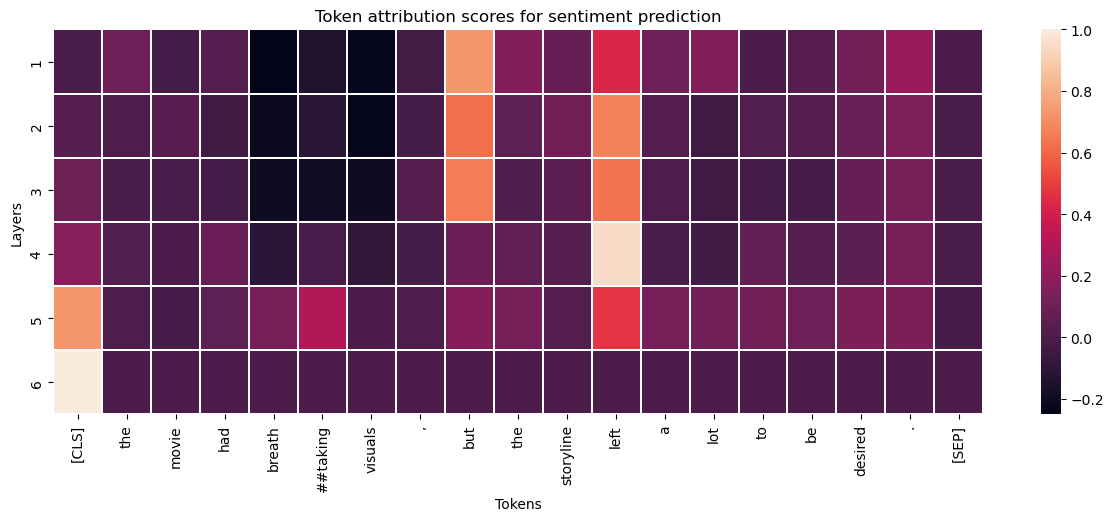

In [11]:
visualizer.lc_visualize_layers()

### .lc_visualize_token_() methods
* For a choice of token (for example "name"), produces some plots.

In [12]:
token_to_analyze = 'but'

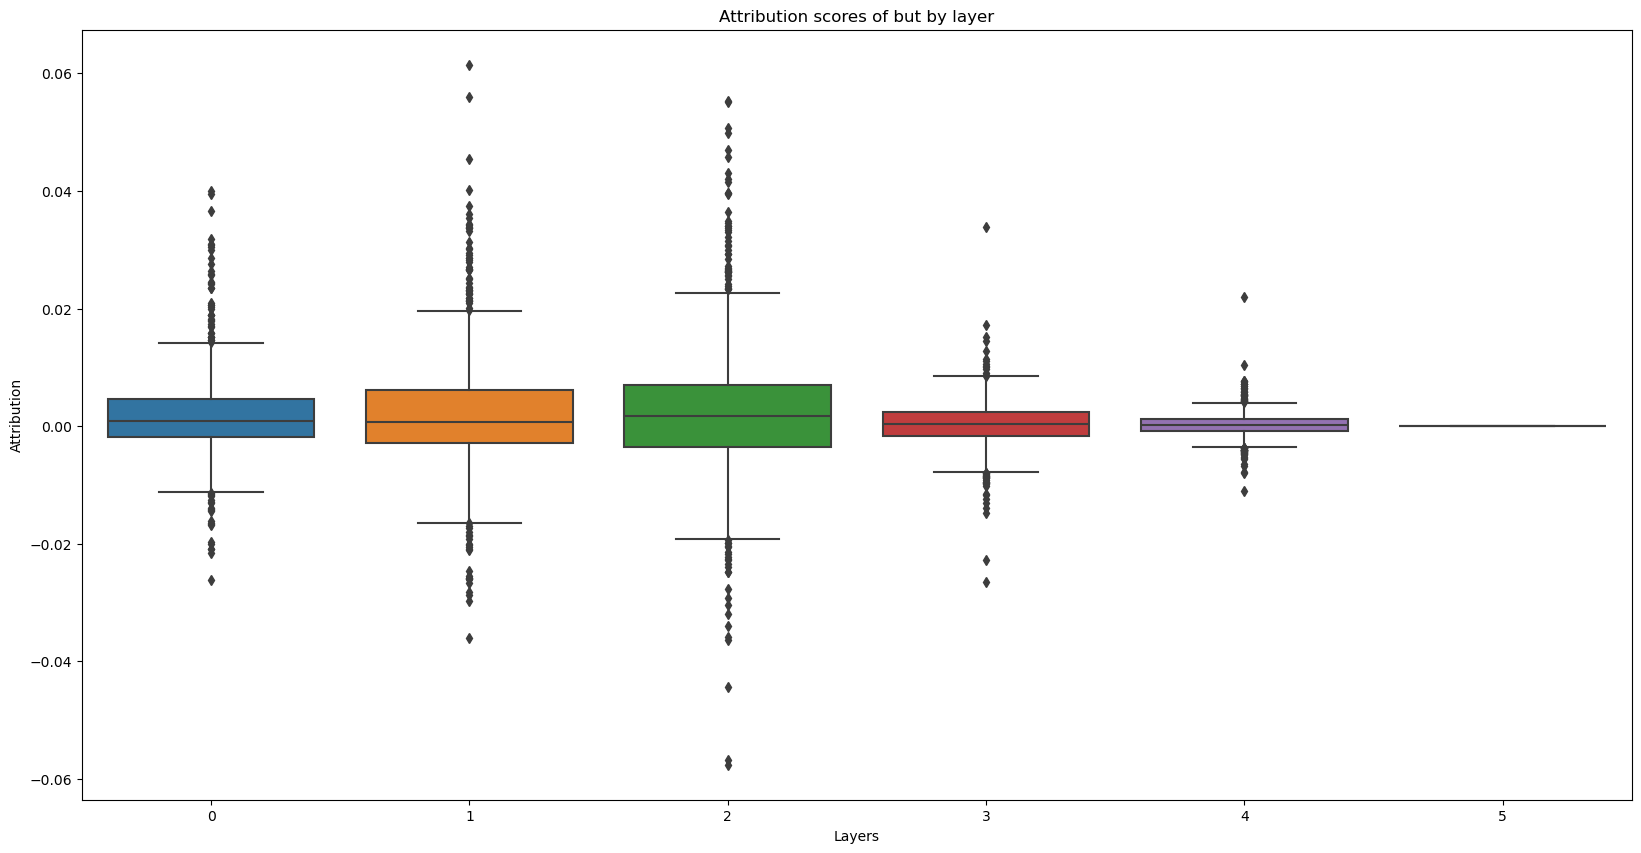

In [13]:
visualizer.lc_visualize_token_boxes(token_to_analyze)

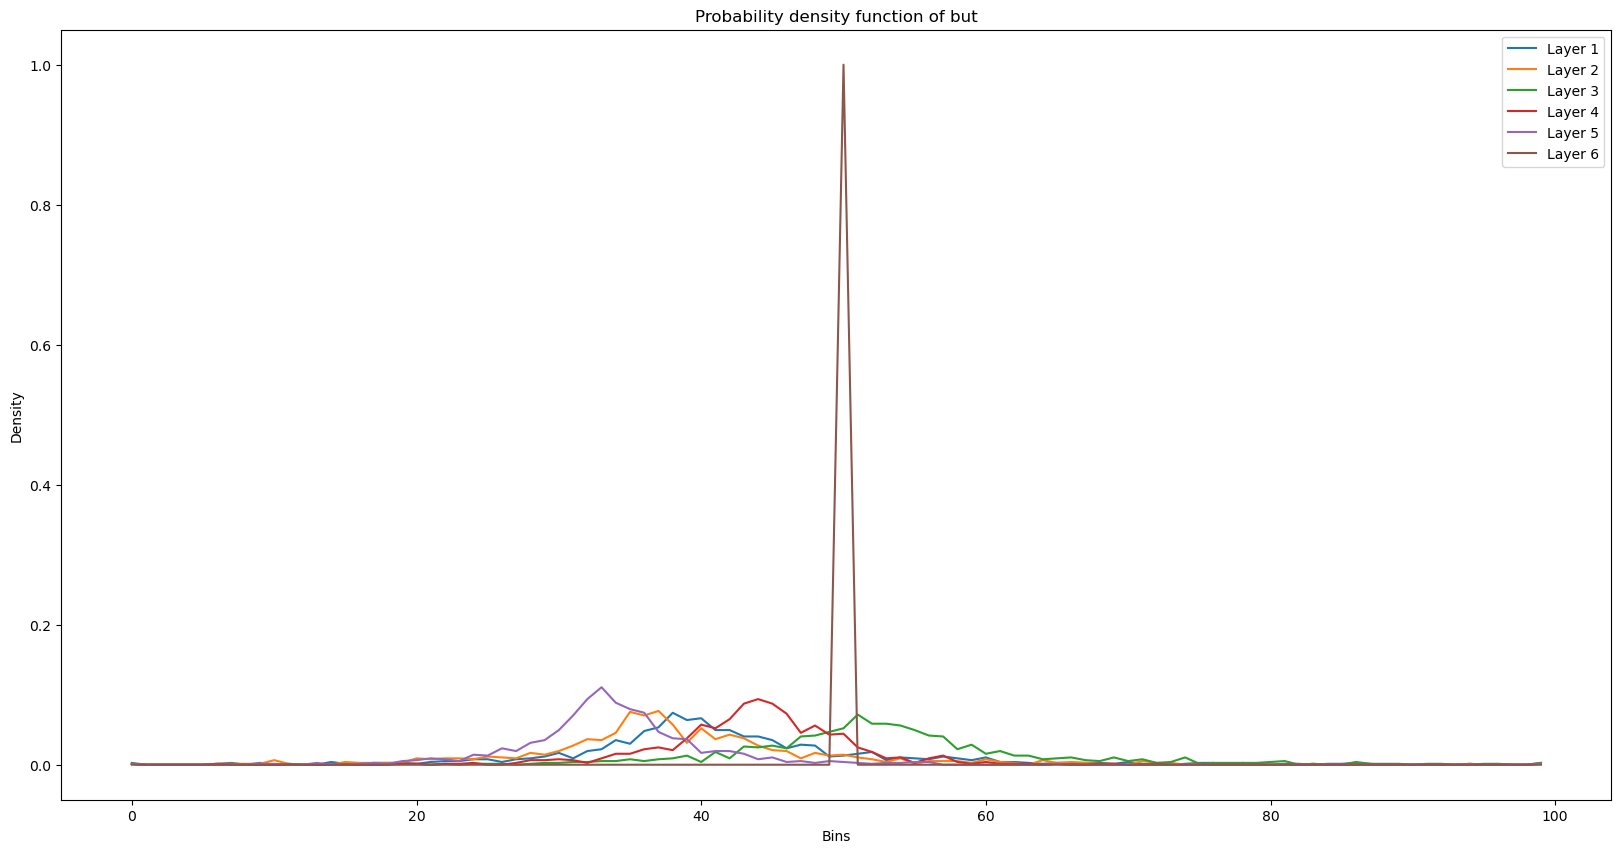

In [14]:
visualizer.lc_visualize_token_pdfs(token_to_analyze)

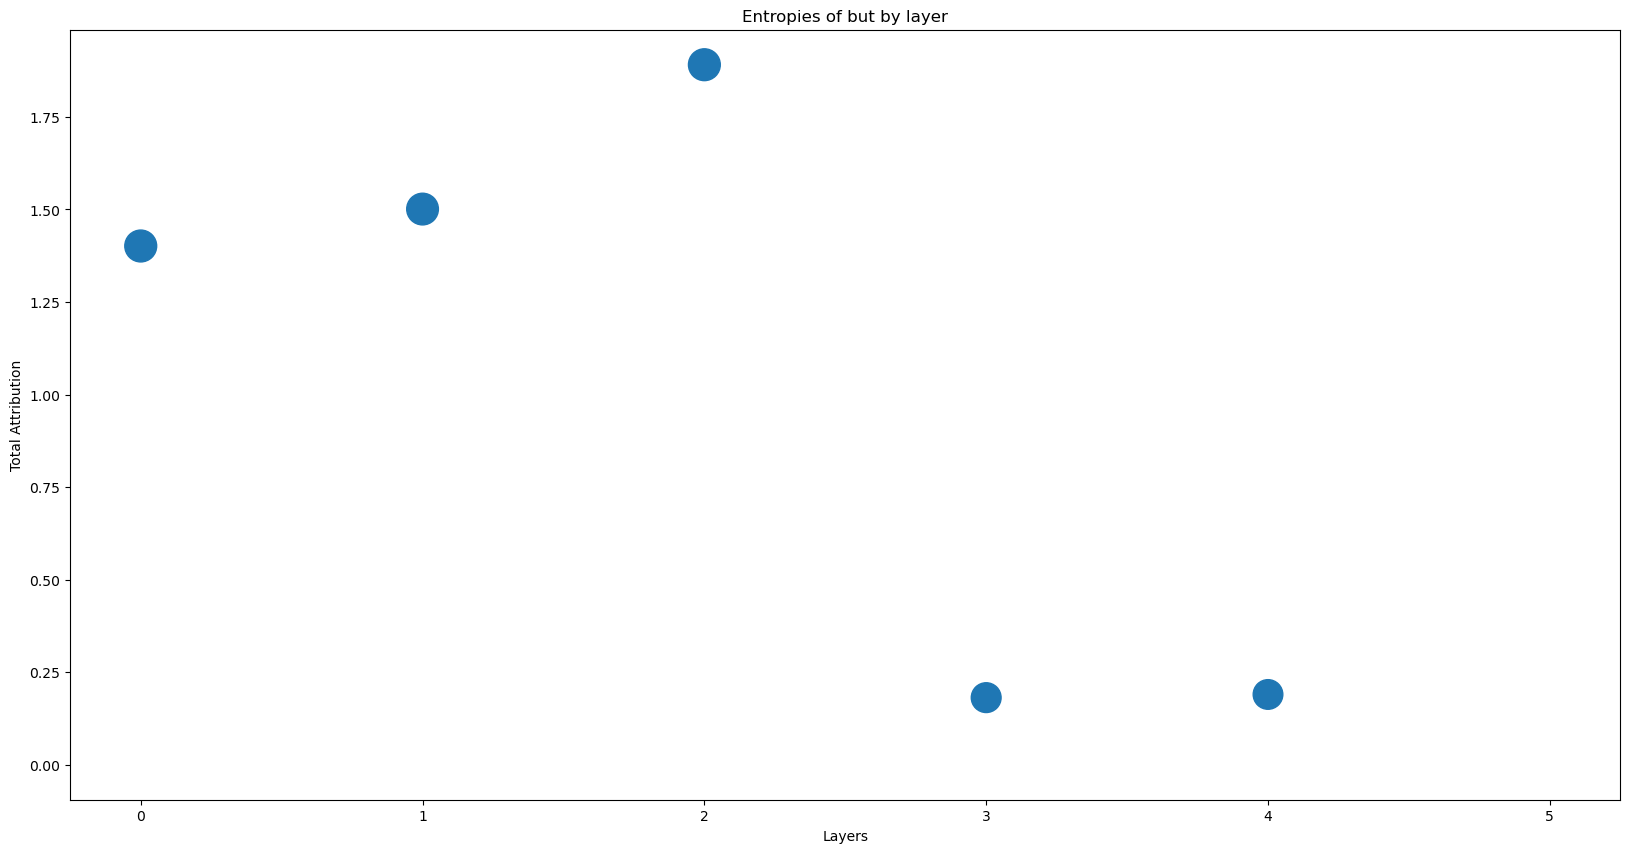

In [15]:
visualizer.lc_visualize_token_entropies(token_to_analyze)